In this notebook, we will build a 3D map of a scene from a small set of images and then localize an image

In [1]:
%load_ext autoreload
%autoreload 2
import tqdm, tqdm.notebook, pycolmap
tqdm.tqdm = tqdm.notebook.tqdm  # notebook-friendly progress bars
from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_retrieval, localize_sfm, pairs_from_exhaustive
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

box_images - get camera pose by sfm.  
use superpoint, superglue, exhaustive matching. 

In [9]:
images = Path('datasets/box_recon/box_images')
outputs = Path('outputs/box_recon/box_images')

# sfm_pairs = outputs / 'pairs-sfm.txt'
# sfm_dir = outputs / 'sfm'
# loc_pairs = outputs / 'pairs-loc.txt'

sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'features.h5'
matches = outputs / 'matches.h5'
# retrieval_conf = extract_features.confs['netvlad']
feature_conf = extract_features.confs['superpoint_inloc']
matcher_conf = match_features.confs['superglue']

In [11]:
references = [p.relative_to(images).as_posix() for p in images.iterdir()]
print(len(references), "mapping images")
extract_features.main(feature_conf, images, image_list=references, feature_path=features)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '1641.46059, 1639.47179, 1511.55636, 2048.40695, 0.009155504536407443, 0.003828372909369376, -0.0004055240480987258, -0.006761129706299007'
# image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, features, matches, camera_mode=pycolmap.CameraMode.SINGLE, image_list=references, image_options=image_options, mapper_options=mapper_options)

[2023/04/07 11:18:11 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}


70 mapping images
Loaded SuperPoint model


[2023/04/07 11:18:15 hloc INFO] Finished exporting features.
[2023/04/07 11:18:15 hloc INFO] Found 2415 pairs.
[2023/04/07 11:18:15 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


Loaded SuperGlue model ("outdoor" weights)


[2023/04/07 11:24:37 hloc INFO] Finished exporting matches.
[2023/04/07 11:24:37 hloc INFO] Creating an empty database...
[2023/04/07 11:24:37 hloc INFO] Importing images into the database...
[2023/04/07 11:24:43 hloc INFO] Importing features into the database...


  0%|          | 0/70 [00:00<?, ?it/s]

[2023/04/07 11:24:43 hloc INFO] Importing matches into the database...


  0%|          | 0/2415 [00:00<?, ?it/s]

[2023/04/07 11:24:44 hloc INFO] Performing geometric verification of the matches...
[2023/04/07 11:24:52 hloc INFO] Running 3D reconstruction...
[2023/04/07 11:26:32 hloc INFO] Reconstructed 1 model(s).
[2023/04/07 11:26:32 hloc INFO] Largest model is #0 with 70 images.
[2023/04/07 11:26:32 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 70
	num_cameras = 1
	num_points3D = 26738
	num_observations = 120042
	mean_track_length = 4.48957
	mean_observations_per_image = 1714.89
	mean_reprojection_error = 1.49569
	num_input_images = 70


In [2]:
images = Path('datasets/box_recon/20230329_105130-normal-25fps')
outputs = Path('outputs/box_recon/20230329_105130-normal-25fps-test')

sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'features.h5'
matches = outputs / 'matches.h5'
# retrieval_conf = extract_features.confs['netvlad']
feature_conf = extract_features.confs['superpoint_inloc']
matcher_conf = match_features.confs['superglue']

In [ ]:
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
print(len(references), "mapping images")
extract_features.main(feature_conf, images, image_list=references, feature_path=features)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '906.0804341080022, 911.9912443257355, 730.0029979627827, 700.6146374410489, 0.00003584909377177392, -0.00002014337127059466, -0.0099156764662087, 0.06144578903316186'
# image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, features, matches, camera_mode=pycolmap.CameraMode.SINGLE, image_list=references, image_options=image_options, mapper_options=mapper_options)

In [42]:
images = Path('datasets/box_recon/20230329_105301-wide-30fps')
outputs = Path('outputs/box_recon/20230329_105301-wide-30fps')

sfm_pairs = outputs / 'pairs-sfm.txt'
sfm_dir = outputs / 'sfm'
loc_pairs = outputs / 'pairs-loc.txt'

retrieval_conf = extract_features.confs['netvlad']
feature_conf = extract_features.confs['superpoint_inloc']
matcher_conf = match_features.confs['superglue']

In [43]:
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=references)
feature_path = extract_features.main(feature_conf, images, outputs)
pairs_from_retrieval.main(global_descriptors, sfm_pairs, num_matched=15)
match_path = match_features.main(matcher_conf, sfm_pairs, feature_conf['output'], outputs)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '906.0804341080022, 911.9912443257355, 730.0029979627827, 700.6146374410489, 0.00003584909377177392, -0.00002014337127059466, -0.0099156764662087, 0.06144578903316186'
image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path, camera_mode=pycolmap.CameraMode.SINGLE, image_list=references, image_options=image_options, mapper_options=mapper_options)

[2023/03/31 10:37:52 hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/03/31 10:37:58 hloc INFO] Finished exporting features.
[2023/03/31 10:37:58 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[2023/03/31 10:37:58 hloc INFO] Found 51 images in root datasets/box_recon/20230329_105301-wide-30fps.


Loaded SuperPoint model


[2023/03/31 10:38:00 hloc INFO] Finished exporting features.
[2023/03/31 10:38:00 hloc INFO] Extracting image pairs from a retrieval database.
[2023/03/31 10:38:00 hloc INFO] Found 765 pairs.
[2023/03/31 10:38:00 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


Loaded SuperGlue model ("outdoor" weights)


[2023/03/31 10:38:26 hloc INFO] Finished exporting matches.
[2023/03/31 10:38:26 hloc INFO] Creating an empty database...
[2023/03/31 10:38:26 hloc INFO] Importing images into the database...
[2023/03/31 10:38:27 hloc INFO] Importing features into the database...


  0%|          | 0/51 [00:00<?, ?it/s]

[2023/03/31 10:38:27 hloc INFO] Importing matches into the database...


  0%|          | 0/765 [00:00<?, ?it/s]

[2023/03/31 10:38:27 hloc INFO] Performing geometric verification of the matches...
[2023/03/31 10:38:28 hloc INFO] Running 3D reconstruction...
[2023/03/31 10:39:02 hloc INFO] Reconstructed 1 model(s).
[2023/03/31 10:39:02 hloc INFO] Largest model is #0 with 51 images.
[2023/03/31 10:39:02 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 51
	num_cameras = 1
	num_points3D = 10144
	num_observations = 38976
	mean_track_length = 3.84227
	mean_observations_per_image = 764.235
	mean_reprojection_error = 1.41348
	num_input_images = 51


In [3]:
images = Path('datasets/box_recon/20230329_105130-normal-25fps')
outputs = Path('outputs/box_recon/20230329_105130-normal-25fps')

sfm_pairs = outputs / 'pairs-sfm.txt'
sfm_dir = outputs / 'sfm'
loc_pairs = outputs / 'pairs-loc.txt'

retrieval_conf = extract_features.confs['netvlad']
feature_conf = extract_features.confs['superpoint_inloc']
matcher_conf = match_features.confs['superglue']

In [3]:
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=references)
feature_path = extract_features.main(feature_conf, images, outputs)
pairs_from_retrieval.main(global_descriptors, sfm_pairs, num_matched=15)
match_path = match_features.main(matcher_conf, sfm_pairs, feature_conf['output'], outputs)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '1746.62095271736, 1748.372453327259, 743.4356818856295, 725.500213518485, 0.001404258221314733, 0.001154879836791837, 0.03593058502346517, 0.1662781594836279'
image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path, camera_mode=pycolmap.CameraMode.SINGLE, image_list=references, image_options=image_options, mapper_options=mapper_options)

[2023/03/31 10:59:57 hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/03/31 11:00:05 hloc INFO] Finished exporting features.
[2023/03/31 11:00:05 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[2023/03/31 11:00:05 hloc INFO] Found 41 images in root datasets/box_recon/20230329_105130-normal-25fps.


Loaded SuperPoint model


[2023/03/31 11:00:07 hloc INFO] Finished exporting features.
[2023/03/31 11:00:07 hloc INFO] Extracting image pairs from a retrieval database.
[2023/03/31 11:00:07 hloc INFO] Found 615 pairs.
[2023/03/31 11:00:07 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


Loaded SuperGlue model ("outdoor" weights)


[2023/03/31 11:00:47 hloc INFO] Finished exporting matches.
[2023/03/31 11:00:47 hloc INFO] Creating an empty database...
[2023/03/31 11:00:47 hloc INFO] Importing images into the database...
[2023/03/31 11:00:48 hloc INFO] Importing features into the database...


  0%|          | 0/41 [00:00<?, ?it/s]

[2023/03/31 11:00:48 hloc INFO] Importing matches into the database...


  0%|          | 0/615 [00:00<?, ?it/s]

[2023/03/31 11:00:48 hloc INFO] Performing geometric verification of the matches...
[2023/03/31 11:00:49 hloc INFO] Running 3D reconstruction...
[2023/03/31 11:01:38 hloc INFO] Reconstructed 1 model(s).
[2023/03/31 11:01:38 hloc INFO] Largest model is #0 with 41 images.
[2023/03/31 11:01:38 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 41
	num_cameras = 1
	num_points3D = 7413
	num_observations = 22318
	mean_track_length = 3.01066
	mean_observations_per_image = 544.341
	mean_reprojection_error = 1.30672
	num_input_images = 41


colmap dense recon

In [ ]:
! colmap image_undistorter --image_path datasets/box_recon/20230329_105301-wide-30fps --input_path outputs/box_recon/20230329_105301-wide-30fps/sfm --output_path outputs/box_recon/20230329_105301-wide-30fps/sfm/dense --output_type COLMAP --max_image_size 2000

In [4]:
sfm_dir = outputs / 'sfm2'
sfm_dir

PosixPath('outputs/box_recon/20230329_105130-normal-25fps/sfm2')

In [6]:
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=references)
feature_path = extract_features.main(feature_conf, images, outputs)
pairs_from_retrieval.main(global_descriptors, sfm_pairs, num_matched=15)
match_path = match_features.main(matcher_conf, sfm_pairs, feature_conf['output'], outputs)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '1746.62095271736, 1748.372453327259, 743.4356818856295, 725.500213518485, 0.001404258221314733, 0.001154879836791837, 0.03593058502346517, 0.1662781594836279'
image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path, image_list=references, image_options=image_options, mapper_options=mapper_options)

[2023/03/31 11:41:47 hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/03/31 11:41:48 hloc INFO] Skipping the extraction.
[2023/03/31 11:41:48 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[2023/03/31 11:41:48 hloc INFO] Found 41 images in root datasets/box_recon/20230329_105130-normal-25fps.
[2023/03/31 11:41:48 hloc INFO] Skipping the extraction.
[2023/03/31 11:41:48 hloc INFO] Extracting image pairs from a retrieval database.
[2023/03/31 11:41:49 hloc INFO] Found 615 pairs.
[2023/03/31 11:41:49 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


  0%|          | 0/41 [00:00<?, ?it/s]

[2023/03/31 11:41:50 hloc INFO] Importing matches into the database...


  0%|          | 0/615 [00:00<?, ?it/s]

[2023/03/31 11:41:50 hloc INFO] Performing geometric verification of the matches...
[2023/03/31 11:41:51 hloc INFO] Running 3D reconstruction...
[2023/03/31 11:42:35 hloc INFO] Reconstructed 1 model(s).
[2023/03/31 11:42:35 hloc INFO] Largest model is #0 with 41 images.
[2023/03/31 11:42:35 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 41
	num_cameras = 41
	num_points3D = 7936
	num_observations = 24448
	mean_track_length = 3.08065
	mean_observations_per_image = 596.293
	mean_reprojection_error = 1.315
	num_input_images = 41


In [45]:
images = Path('datasets/box_recon/20230329_105234-normal-25fps')
outputs = Path('outputs/box_recon/20230329_105234-normal-25fps')

sfm_pairs = outputs / 'pairs-sfm.txt'
sfm_dir = outputs / 'sfm'
loc_pairs = outputs / 'pairs-loc.txt'

retrieval_conf = extract_features.confs['netvlad']
feature_conf = extract_features.confs['superpoint_inloc']
matcher_conf = match_features.confs['superglue']

In [46]:
sfm_dir = outputs / 'sfm'
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=references)
feature_path = extract_features.main(feature_conf, images, outputs)
pairs_from_retrieval.main(global_descriptors, sfm_pairs, num_matched=15)
match_path = match_features.main(matcher_conf, sfm_pairs, feature_conf['output'], outputs)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '1746.62095271736, 1748.372453327259, 743.4356818856295, 725.500213518485, 0.001404258221314733, 0.001154879836791837, 0.03593058502346517, 0.1662781594836279'
image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path, camera_mode=pycolmap.CameraMode.SINGLE, image_list=references, image_options=image_options, mapper_options=mapper_options)

[2023/03/31 10:47:36 hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/03/31 10:47:42 hloc INFO] Finished exporting features.
[2023/03/31 10:47:42 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 4},
 'output': 'feats-superpoint-n4096-r1600',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[2023/03/31 10:47:42 hloc INFO] Found 42 images in root datasets/box_recon/20230329_105234-normal-25fps.


Loaded SuperPoint model


[2023/03/31 10:47:44 hloc INFO] Finished exporting features.
[2023/03/31 10:47:44 hloc INFO] Extracting image pairs from a retrieval database.
[2023/03/31 10:47:44 hloc INFO] Found 630 pairs.
[2023/03/31 10:47:44 hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}


Loaded SuperGlue model ("outdoor" weights)


[2023/03/31 10:48:25 hloc INFO] Finished exporting matches.
[2023/03/31 10:48:25 hloc INFO] Creating an empty database...
[2023/03/31 10:48:25 hloc INFO] Importing images into the database...
[2023/03/31 10:48:25 hloc INFO] Importing features into the database...


  0%|          | 0/42 [00:00<?, ?it/s]

[2023/03/31 10:48:25 hloc INFO] Importing matches into the database...


  0%|          | 0/630 [00:00<?, ?it/s]

[2023/03/31 10:48:25 hloc INFO] Performing geometric verification of the matches...
[2023/03/31 10:48:27 hloc INFO] Running 3D reconstruction...
[2023/03/31 10:49:05 hloc INFO] Reconstructed 1 model(s).
[2023/03/31 10:49:05 hloc INFO] Largest model is #0 with 42 images.
[2023/03/31 10:49:05 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 42
	num_cameras = 1
	num_points3D = 11091
	num_observations = 35804
	mean_track_length = 3.2282
	mean_observations_per_image = 852.476
	mean_reprojection_error = 1.3803
	num_input_images = 42


In [52]:
images = Path('datasets/box_recon/20230329_105234-normal-25fps')
outputs = Path('outputs/box_recon/20230329_105234-normal-25fps-sift')

sfm_pairs = outputs / 'pairs-sfm.txt'
sfm_dir = outputs / 'sfm'
loc_pairs = outputs / 'pairs-loc.txt'

# retrieval_conf = extract_features.confs['netvlad']
feature_conf = extract_features.confs['sift']
matcher_conf = match_features.confs['NN-ratio']

In [53]:
sfm_dir = outputs / 'sfm'
references = [p.relative_to(images).as_posix() for p in (images / 'mapping/').iterdir()]
# global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=references)
feature_path = extract_features.main(feature_conf, images, outputs)
# pairs_from_retrieval.main(global_descriptors, sfm_pairs, num_matched=15)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_path = match_features.main(matcher_conf, sfm_pairs, feature_conf['output'], outputs)

mapper_options = pycolmap.IncrementalMapperOptions()
mapper_options.ba_refine_focal_length = False
mapper_options.ba_refine_extra_params = False
mapper_options.ba_refine_principal_point = False
mapper_options = mapper_options.todict()

image_options = pycolmap.ImageReaderOptions()
image_options.camera_model = 'OPENCV' # fx, fy, cx, cy, k1, k2, p1, p2
image_options.camera_params = '1746.62095271736, 1748.372453327259, 743.4356818856295, 725.500213518485, 0.001404258221314733, 0.001154879836791837, 0.03593058502346517, 0.1662781594836279'
image_options.todict()

model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path, camera_mode=pycolmap.CameraMode.SINGLE, image_list=references, image_options=image_options, mapper_options=mapper_options)

[2023/03/31 10:54:44 hloc INFO] Extracting local features with configuration:
{'model': {'name': 'dog'},
 'output': 'feats-sift',
 'preprocessing': {'grayscale': True, 'resize_max': 1600}}
[2023/03/31 10:54:44 hloc INFO] Found 42 images in root datasets/box_recon/20230329_105234-normal-25fps.
[2023/03/31 10:54:44 hloc INFO] Skipping the extraction.
[2023/03/31 10:54:44 hloc INFO] Found 861 pairs.
[2023/03/31 10:54:44 hloc INFO] Matching local features with configuration:
{'model': {'do_mutual_check': True,
           'name': 'nearest_neighbor',
           'ratio_threshold': 0.8},
 'output': 'matches-NN-mutual-ratio.8'}
[2023/03/31 10:54:47 hloc INFO] Finished exporting matches.
[2023/03/31 10:54:47 hloc INFO] Creating an empty database...
[2023/03/31 10:54:47 hloc INFO] Importing images into the database...
[2023/03/31 10:54:48 hloc INFO] Importing features into the database...


  0%|          | 0/42 [00:00<?, ?it/s]

[2023/03/31 10:54:48 hloc INFO] Importing matches into the database...


  0%|          | 0/861 [00:00<?, ?it/s]

[2023/03/31 10:54:48 hloc INFO] Performing geometric verification of the matches...
[2023/03/31 10:54:49 hloc INFO] Running 3D reconstruction...
[2023/03/31 10:55:02 hloc INFO] Reconstructed 1 model(s).
[2023/03/31 10:55:02 hloc INFO] Largest model is #0 with 42 images.
[2023/03/31 10:55:02 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 42
	num_cameras = 1
	num_points3D = 2407
	num_observations = 9505
	mean_track_length = 3.9489
	mean_observations_per_image = 226.31
	mean_reprojection_error = 1.16855
	num_input_images = 42


In [28]:
if sfm_dir.exists(): 
    model = pycolmap.Reconstruction()
    model.read_binary(sfm_dir.as_posix())
else:
    model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path, image_list=references)

In [ ]:
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(255,0,0,0.5)', name="mapping")
fig.show()

In [ ]:
import h5py

def list_h5_names(path):
    names = []
    with h5py.File(str(path), 'r', libver='latest') as fd:
        def visit_fn(_, obj):
            if isinstance(obj, h5py.Dataset):
                names.append(obj.parent.name.strip('/'))
        fd.visititems(visit_fn)
    return list(set(names))

In [ ]:
list_h5_names('/home/keunmo/workspace/Hierarchical-Localization/outputs/hangwon_park_wide_10pair/feats-superpoint-n4096-r1024_matches-superglue_pairs-sfm.h5')

We also visualize which keypoints were triangulated into the 3D model.

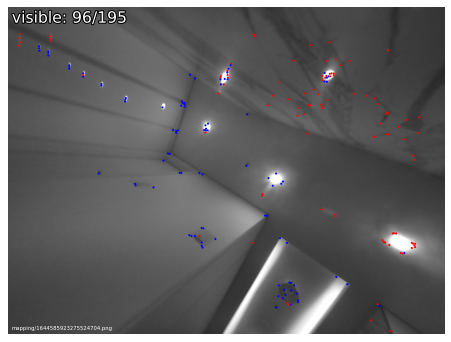

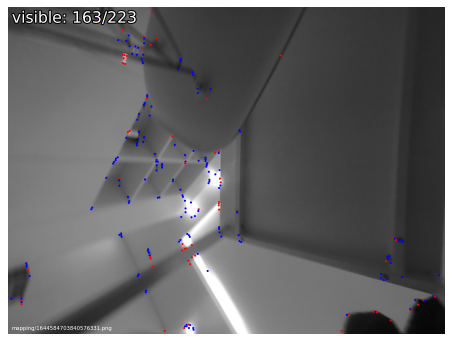

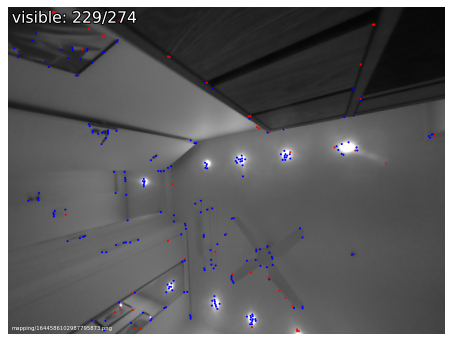

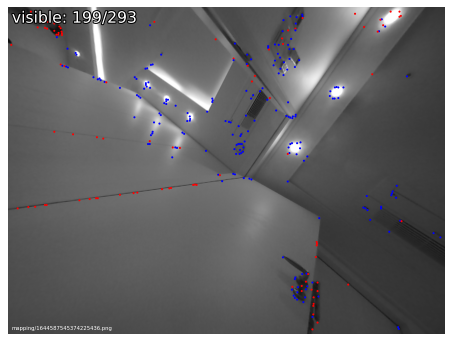

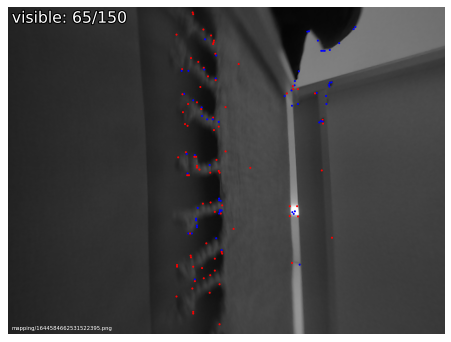

In [23]:
visualization.visualize_sfm_2d(model, images, color_by='visibility', n=5)

In [ ]:
# read depth map
# depth_map = Path('/home/keunmo/workspace/Hierarchical-Localization/outputs/hangwon_park_wide_10pair/sfm/dense/stereo/normal_maps/mapping/20221103_124225.jpg.geometric.bin')

import argparse
import numpy as np
import os
import struct

def read_array(path):
    with open(path, "rb") as fid:
        width, height, channels = np.genfromtxt(fid, delimiter="&", max_rows=1,
                                                usecols=(0, 1, 2), dtype=int)
        fid.seek(0)
        num_delimiter = 0
        byte = fid.read(1)
        while True:
            if byte == b"&":
                num_delimiter += 1
                if num_delimiter >= 3:
                    break
            byte = fid.read(1)
        array = np.fromfile(fid, np.float32)
    array = array.reshape((width, height, channels), order="F")
    return np.transpose(array, (1, 0, 2)).squeeze()


def write_array(array, path):
    """
    see: src/mvs/mat.h
        void Mat<T>::Write(const std::string& path)
    """
    assert array.dtype == np.float32
    if len(array.shape) == 2:
        height, width = array.shape
        channels = 1
    elif len(array.shape) == 3:
        height, width, channels = array.shape
    else:
        assert False

    with open(path, "w") as fid:
        fid.write(str(width) + "&" + str(height) + "&" + str(channels) + "&")

    with open(path, "ab") as fid:
        if len(array.shape) == 2:
            array_trans = np.transpose(array, (1, 0))
        elif len(array.shape) == 3:
            array_trans = np.transpose(array, (1, 0, 2))
        else:
            assert False
        data_1d = array_trans.reshape(-1, order="F")
        data_list = data_1d.tolist()
        endian_character = "<"
        format_char_sequence = "".join(["f"] * len(data_list))
        byte_data = struct.pack(endian_character + format_char_sequence, *data_list)
        fid.write(byte_data)

In [ ]:
depth_map = read_array('/home/keunmo/workspace/Hierarchical-Localization/outputs/hangwon_park_wide_10pair/sfm/dense/stereo/depth_maps/mapping/20221103_124257.jpg.photometric.bin')
normal_map = read_array('/home/keunmo/workspace/Hierarchical-Localization/outputs/hangwon_park_wide_10pair/sfm/dense/stereo/normal_maps/mapping/20221103_124257.jpg.photometric.bin')
min_depth, max_depth = np.percentile(depth_map, [5, 95])  # min depth percentile = 5, max depth percentile = 95
depth_map[depth_map < min_depth] = min_depth
depth_map[depth_map > max_depth] = max_depth

In [ ]:
import pylab as plt

# Visualize the depth map.
plt.figure()
plt.imshow(depth_map)
plt.title("depth map")


# Visualize the normal map.
plt.figure()
plt.imshow(normal_map)
plt.title("normal map")

plt.show()

# Localization
Now that we have a 3D map of the scene, we can localize any image. 

In [ ]:
queries = [p.relative_to(images).as_posix() for p in (images / 'query/').iterdir()]
print(len(queries), "query images")
plot_images([read_image(images / r) for r in queries[:4]], dpi=50)

Localization을 위한 pair의 path를 지정한다.

Again, we extract features for the query and match them using retrieval method.  
쿼리 이미지들을 대상으로 아까와 똑같이 global feature를 추출한다.  
추출된 gfeat을 이용해 query 이미지와 유사한 top 20 mapping 이미지를 retrival 해서 pair를 만든다. 


In [ ]:
global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=queries)

In [ ]:
pairs_from_retrieval.main(global_descriptors, loc_pairs, num_matched=10, db_prefix="mapping", query_prefix="query")

In [ ]:
match_features.main(matcher_conf, loc_pairs, features=feature_path, matches=match_path)

In [ ]:
# global_descriptors = extract_features.main(retrieval_conf, images, outputs, image_list=queries)
# pairs_from_retrieval.main(global_descriptors, loc_pairs, num_matched=20, db_prefix="mapping", query_prefix="query")
# match_features.main(matcher_conf, loc_pairs, features=feature_path, matches=match_path)

In [ ]:
query = 'query/20221103_130102.jpg'
plot_images([read_image(images / query)], dpi=75)

In [ ]:
from hloc.localize_sfm import QueryLocalizer, pose_from_cluster

In [ ]:
queries

In [ ]:
# make query + intrinsic to text file
# format: "query_name camara_model params" each lines
queries = [p.relative_to(images).as_posix() for p in (images / 'query/').iterdir()]

camera_model = 'OPENCV' # w, h, fx, fy, cx, cy, k1, k2, p1, p2
params = [1008, 756, 762.4599917, 764.2251910, 506.6184151, 369.3201742, 0.0564670, -0.0041678, 0.0001121, -0.0012250]  # s20fe norm camera
with open(outputs / 'queries.txt', 'w') as f:
    for query in queries:
        f.write(f'{query} {camera_model} {" ".join(map(str, params))}\n')

In [ ]:
results = outputs / 'query_result.txt'  # the result file

localize_sfm.main(
    model, 
    outputs / 'queries.txt',
    loc_pairs,
    feature_path,
    match_path,
    results,
    covisibility_clustering=False
)

In [ ]:
import numpy as np

selected_query = 3  # start from 0
with open(results, 'r') as f:
    for i, line in enumerate(f):
        line = line.strip()
        if i == selected_query:
            qname, qvec, tvec = line.split(' ')[0], line.split(' ')[1:5], line.split(' ')[5:]
            break
# make qvec and tvec to numpy array
qvec = np.array(qvec, dtype=np.float32)
tvec = np.array(tvec, dtype=np.float32)
print(qname, qvec, tvec)

In [ ]:
params

In [ ]:
import pycolmap
import copy
pose = pycolmap.Image(tvec=tvec, qvec=qvec)
# camera = pycolmap.infer_camera_from_image(images / 'query' / qname)
# qdata = 'query/20221004_153100.jpg OPENCV 1008 756 765.171818 765.171818 504.0 378.0 0.062161 -0.047225 0.003354 -0.002883'
qdata = query + ' ' + camera_model + ' ' + ' '.join(map(str, params))  # s20fe norm camera'
name, *data = qdata.split()
model, width, height, *params = data
params = np.array(params, float)
camera = pycolmap.Camera(model, int(width), int(height), params)
query_fig = copy.deepcopy(fig)
viz_3d.plot_camera_colmap(query_fig, pose, camera, color='rgba(0,255,0,0.5)', name=query)
query_fig.show()

In [ ]:
images.absolute()

In [ ]:
query = 'query/20221103_130102.jpg'
query_list = [query]
data_path = images.absolute()
query_list = [(qname, pycolmap.infer_camera_from_image(data_path / qname)) for qname in query_list]
query_list

In [ ]:
query = 'query/20221103_130102.jpg'
queries = [query]

result, log = localize_sfm.localize_from_query_list(
    model, 
    images.absolute(), 
    queries,
    loc_pairs,
    feature_path,
    match_path,
)

result

In [ ]:
result[query][0] # qvec: qw qx qy qz

In [ ]:
result[query][1] # tvec: tx ty tz

In [ ]:
# convert qvec, tvec to left handed coordinate system
qvec = result[query][0]
tvec = result[query][1]


In [ ]:
visualization.visualize_loc_from_log(images, query, log, model)

In [ ]:
import pycolmap
import copy
pose = pycolmap.Image(tvec=result[query][1], qvec=result[query][0])
camera = pycolmap.infer_camera_from_image(images / query)
query_fig = copy.deepcopy(fig)
viz_3d.plot_camera_colmap(query_fig, pose, camera, color='rgba(0,255,0,0.5)', name=query)
query_fig.show()

In [ ]:
query = 'query/20221103_130102.jpg'

result = localize_sfm.localize_from_image(
    model, 
    images, 
    query,
    loc_pairs,
    feature_path,
    match_path,
)

result

In [ ]:
qname2 = '20221004_153208.jpg'
qvec2 = [0.9627620177690892, 0.25593282278789165, -0.06580737458337557, 0.05707080524626274]
tvec2 = [4.186323255803519, 0.3339662360583714, 1.7585978061965364]

We read the EXIF data of the query to infer a rough initial estimate of camera parameters like the focal length. Then we estimate the absolute camera pose using PnP+RANSAC and refine the camera parameters.

We visualize the correspondences between the query images a few mapping images. We can also visualize the estimated camera pose in the 3D map.

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS
from decimal import Decimal

'''Converts the GPS coordinates stored in the EXIF to degress in float format'''
def decimal_coords(coords, ref):
    decimal_degrees = Decimal(str(coords[0])) + Decimal(str(coords[1])) / 60 + Decimal(str(coords[2])) / 3600
    if ref == "S" or ref == "W":
        decimal_degrees = -decimal_degrees
    # print(decimal_degrees)
    # round(decimal_degrees, 8)
    return round(decimal_degrees, 8)

'''
extract time and gps from exif and save to file
format: "img_name yyyy:mm:dd hh:mm:ss lat lon alt
'''
def extract_img_data(img_path, output_path):
    with open(output_path, 'w') as f:
        for img in img_path.iterdir():
            img_name = img_path.name + '/' + img.name
            # img = Image.open(img)
            # exif = img._getexif()
            exif = Image.open(img)._getexif()
            if exif is None:
                f.write(f'{img_name} 0 0 0 0 0')
                continue
            time = exif[36867]
            gps = exif[34853]
            lat = decimal_coords(gps[2], gps[1])
            lon = decimal_coords(gps[4], gps[3])
            if (type(gps[5]) == bytes):
                alt_ref = int.from_bytes(gps[5], byteorder='little')
            else:
                alt_ref = gps[5]
            if alt_ref == 0:
                alt = gps[6]
            else:
                alt = -gps[6]
            f.write(f'{img_name} {time} {lat} {lon} {alt}\n')


data_path = Path('datasets/fastfive')
img_path = data_path / 'mapping'
img_data = data_path / 'image_data.txt'

extract_img_data(img_path, img_data)


In [ ]:
%pip install folium
import folium

In [ ]:
import folium

# # mark the location of the mapping images on the map using folium
# def mark_map(img_data, output_path):
#     m = folium.Map(location=[0, 0], zoom_start=14)
#     with open(img_data, 'r') as f:
#         for line in f:
#             img_name, date, time, lat, lon, alt = line.split(' ')
#             folium.Marker([lat, lon], popup=img_name).add_to(m)
#     m.save(output_path)

img_data = data_path / 'image_data.txt'

m = folium.Map(location=[37.548642, 127.044125], zoom_start=100)
with open(img_data, 'r') as f:
    for line in f:
        img_name, date, time, lat, lon, alt = line.split(' ')
        # add Marker, size = 10, popup image
        # folium.Marker([lat, lon], popup=img_name, icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
        folium.Marker([lat, lon], popup=img_name).add_to(m)
m